# Part II Image Transformation
For this part you are required to write some functions for interpolation and transformation.


In [11]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import math

Please load the example2.png.

In [ ]:
# if you are using Google Colab, please use the below codes to load image
#from google.colab import files
#from io import BytesIO
#uploaded = files.upload()
#img = Image.open(BytesIO(uploaded['example2.png']))

In [12]:
# if you are using local jupyter notebook, please use the below codes to load image
img = Image.open('example2.png')

height: 512  width:  512


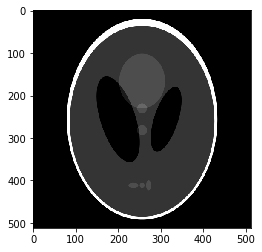

In [13]:
# change the image into a gray image 
img = img.convert('L')
h,w = np.shape(img)
print('height:',h,' width: ',w)
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

## Question1: Bilinear Interpolation
Here you need to implement a function for bilinear interpolation from scratch.
Xq and Yq are arrays of coordinates of the points we want to interpolate. 

For example, Xq=[0.5, 1.2], Yq=[0.8, 1.9] indicate that we want to interpolate the points (0.5, 0.8) and (1.2, 1.9).

The output should be a list of interpolation result.

0
<class 'int'>
-------
70.1
71 70
1
52
<class 'int'>
-------
189.5
190 189
1
0
[52.  0.]


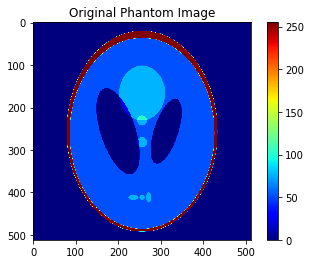

In [14]:
def interp2(pil_img, Xq, Yq):
    image = np.array(pil_img)
    print(str(image[5,5]))
    plt.figure()
    plt.imshow(image,cmap='jet')
    plt.colorbar()
    plt.title('Original Phantom Image')
    
    
    interp_intensity = np.zeros((len(Xq)))

    for ii in range(0,len(Xq)):
        x = Xq[ii]
        y = Yq[ii]
        x1 = int(np.floor(x))
        print(type(x1))
        x2 = int(np.ceil(x))
        y1 = int(np.floor(y))
        y2 = int(np.ceil(y))
        
        #corners values with image intensities
        Q11 = image[y1,x1]
        Q12 = image[y1,x2]
        Q21 = image[y2,x1]
        Q22 = image[y2,x2]
        
        r1 = ((x2 - x)/(x2 - x1)) * Q11 + ((x - x1)/(x2 - x1))*Q21
        r2 = ((x2 - x)/(x2 - x1)) * Q12 + ((x - x1)/(x2 - x1))*Q22
        
        print('-------')
        print(y)
        print(y2,y1)
        print(y2-y1)
        print(Q11)
        interp_intensity[ii] = ((y2 - y)/(y2 - y1))*r1 + ((y - y1)/(y2 - y1))*r2

#R1 = ((x2 – x)/(x2 – x1))*Q11 + ((x – x1)/(x2 – x1))*Q21

#R2 = ((x2 – x)/(x2 – x1))*Q12 + ((x – x1)/(x2 – x1))*Q22
    
        interp_points = interp_intensity
    return interp_points

Xq=[254.1, 200.8]
Yq=[70.1, 189.5] 

img.size
out = interp2(img,Xq,Yq)
print(out)



## Question 2: Write a function that creates a 2D affine transformation matrix in homogenous and its inverse from a sequence of elementary transformations

The input is a list of operation name and its parameters. The operation is restricted to {rotation, shear, shift, scaling}.

For example, [('scaling', 1.2), ('shift', [10 20]), ('scaling', .2), ('rotation', 90)]

Your return should be the composed affine matrix, and its inverse.

In [104]:
from numpy.linalg import inv
import math

'''
Order of operations for transform:
1. Get center coordinates of image
2. Move origin to center coordinates (translate image to 0,0)
3. Apply transforms
4. move center of new image to middle of image space
'''


#! numpy cos,sin require inputs as radians
deg2rad = np.pi/180.0


def rotate(theta):
    theta = theta*deg2rad
    M = np.zeros((3,3))
    c = np.cos(theta)
    s = np.sin(theta)
    
    M = [(c,-s,0),(s,c,0),(0,0,1)]
    print(M)
    return M

def scaling(sx,sy):
    M = np.zeros((3,3))
    M = [(sx,0,0),(0,sy,0),(0,0,1)]
    print(M)
    return M[:]

def shearx(shx):
    M = np.zeros((3,3))
    M = [(1,shx,0),(0,1,0),(0,0,1)]
    print(M)
    return M

def shift(tx,ty):
    M = np.zeros((3,3))
    M = [(1,0,tx),(0,1,ty),(0,0,1)]
    print(M)
    return M

def get_affine_matrix(op_list):
    '''
    Write your own code here.
    '''
    affine_matrix = 0
    iaffine_matrix = 0
    
    command_list = []
    arg_list = []
    M_train = []
    
    #op_list will need to match the type of transform and its change
    
    
    #scan op_list for the type of transform
    print(len(op_list))
    print(len(op_list[0]))
    for ii in range(0,len(op_list)):
        #print(op_list[0][0])
        #command = upper(op_list[ii][0])
        #convert 1st element in list to uppercase 
        command = op_list[ii][0].upper()
        arg_values = op_list[ii][1:]
        print("command is ",command)
        print("arguments are",str(arg_values))
        if(command == 'SCALING'):
            print('Found SCALING')
            command_list.append('SCALING')
            arg_list.append(arg_values)
            print(arg_values)
            M_train.append(scaling(arg_values[0],arg_values[1]))
        elif(command == 'SHIFT'):
            print('Found SHIFT')
            command_list.append('SHIFT')
            arg_list.append([arg_values])
            M_train.append(shift(arg_values[0],arg_values[1]))
        elif (command == 'ROTATE'):
            print('Found ROTATE')
            command_list.append('ROTATE')
            arg_list.append([arg_values])
            M_train.append(rotate(arg_values[0]))
        elif (command == 'TRANSLATE'):
            print('Found TRANSLATE')
            command_list.append('TRANSLATE')
            arg_list.append([arg_values])
        elif (command == 'SHEAR'):
            print('Found SHEAR')
            command_list.append('SHEAR')
            arg_list.append([arg_values])
            M_train.append(shear(arg_values[0],arg_values[1]))
        else:
            
            print("Did not find a valid command")
            return
    
    print('command list is ',command_list)
    print('arg list is',arg_list)
    print('M_train is',M_train)
    print('shape of M_train is ', np.shape(M_train))
    
    #Now that we have the separate commands and the arguments for each, generate those
    #transform matrices
    
    
    
    #a = translation(2,1)
    #b=scaling(5,7)
    #rotation(45)
    #shearx(10)

    #np.dot(a,b)
    affine_matrix = M_train
    return affine_matrix, iaffine_matrix

shift_val = 256.0

output_train = get_affine_matrix([('rotate',45.0), #118.0),
                                  ('scaling',0.5,0.5),
                                  ('shift',0,0)])
print('Affine output shape is',np.shape(output_train))
print('Affine matrix is ',output_train[0])

3
2
command is  ROTATE
arguments are (45.0,)
Found ROTATE
[(0.7071067811865476, -0.7071067811865475, 0), (0.7071067811865475, 0.7071067811865476, 0), (0, 0, 1)]
command is  SCALING
arguments are (0.5, 0.5)
Found SCALING
(0.5, 0.5)
[(0.5, 0, 0), (0, 0.5, 0), (0, 0, 1)]
command is  SHIFT
arguments are (0, 0)
Found SHIFT
[(1, 0, 0), (0, 1, 0), (0, 0, 1)]
command list is  ['ROTATE', 'SCALING', 'SHIFT']
arg list is [[(45.0,)], (0.5, 0.5), [(0, 0)]]
M_train is [[(0.7071067811865476, -0.7071067811865475, 0), (0.7071067811865475, 0.7071067811865476, 0), (0, 0, 1)], [(0.5, 0, 0), (0, 0.5, 0), (0, 0, 1)], [(1, 0, 0), (0, 1, 0), (0, 0, 1)]]
shape of M_train is  (3, 3, 3)
Affine output shape is (2,)
Affine matrix is  [[(0.7071067811865476, -0.7071067811865475, 0), (0.7071067811865475, 0.7071067811865476, 0), (0, 0, 1)], [(0.5, 0, 0), (0, 0.5, 0), (0, 0, 1)], [(1, 0, 0), (0, 1, 0), (0, 0, 1)]]


## Question 3: Based on the below two functions, write a code to achieve the operation of rotation and scaling.

Here you need to write a transformation function which takes the input, affine matrix, iaffine matrix and new shape of your output image. We will compare your transformation result with the functions provided by PIL after a rotation and scaling.

The return should be a 2d matrix of of the result of transforming an image.

T:  img type is  <class 'PIL.Image.Image'>
-----img array from PIL is  (512, 512)
1
3
command is  SCALING
arguments are (1.0, 1.0)
Found SCALING
(1.0, 1.0)
[(1.0, 0, 0), (0, 1.0, 0), (0, 0, 1)]
command list is  ['SCALING']
arg list is [(1.0, 1.0)]
M_train is [[(1.0, 0, 0), (0, 1.0, 0), (0, 0, 1)]]
shape of M_train is  (1, 3, 3)
length of affine transform list is  3
center location of input image is  256 256
[(1, 0, -256), (0, 1, -256), (0, 0, 1)]
[(1, 0, 256), (0, 1, 256), (0, 0, 1)]
T:  new img shape is (512, 512)
T: affine is [[(1, 0, -256), (0, 1, -256), (0, 0, 1)], [(0.7071067811865476, -0.7071067811865475, 0), (0.7071067811865475, 0.7071067811865476, 0), (0, 0, 1)], [(0.5, 0, 0), (0, 0.5, 0), (0, 0, 1)], [(1, 0, 0), (0, 1, 0), (0, 0, 1)], [(1, 0, 256), (0, 1, 256), (0, 0, 1)]]
T:  affine[0] shape is (3, 3)


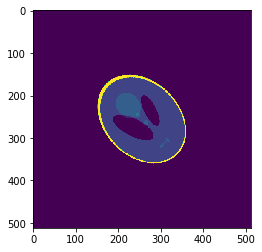

In [124]:
# write the code for transform function
def transform(img, affine_input, iaffine, new_shape):
    '''
    Write your own code here.
    '''
    affine = affine_input.copy()
    if(len(new_shape) > 2):
        print('Too many sizes for shape')
        return 0

    print('length of affine transform list is ',len(affine))
    
    img = np.array(img)
    #output_img = np.zeros((new_shape[0] +50,new_shape[1] +50))
    width,height = img.shape     #original image dimensions
    output_img = np.zeros((height, width))
    
    #
    # Find center of the image given
    # - python is row,col
    xc = int(width/2)
    yc = int(height/2)
    print('center location of input image is ', xc,yc)
    move_origin_t=shift(-yc,-xc)
    affine.insert(0,move_origin_t) # put initial origin move at front of list of transforms
    affine.append(shift(yc,xc))
    #Before doing any transforms, we must make the center of the image the origin.
    
    
    print("T:  new img shape is",img.shape)
    print("T: affine is", affine)
    print('T:  affine[0] shape is',np.shape(affine[0]))
    position = np.array((3,1))
    rval = np.array((512,3))
    debug =0
    for row in range(height): 
        for col in range(width):
            
            #print('img val is ',img[row,col])
            #print('size of a is',np.shape(a))
            #print('size of affine is ',np.shape(affine[0]))
            position = [row,col,1]
            #print('a values are ',a)
            total_transform = np.ones((3,3))
            if (debug ==1):   print('ORIGINAL POSITION:-------->  ',position)
            for x in affine:
                if (debug ==1):    print('x vals are ',x)
                total_transform = total_transform * x
                if (debug ==1):    print('total_transform: \n',total_transform)
                position = np.dot(x,position)
                if (debug ==1):    print('intermediate pos --->',position)
            if (debug ==1):  print('r,c is ',row,col,' position is ', position)
            #print('total_transform: ',total_transform)
            [yp,xp,b] =  position
            #[xp,yp,b]= np.dot(position,affine[0]) #[img[row,col],1] * affine
            
            output_img[int(np.floor(yp)),int(np.floor(xp))] = img[row,col]
    #out = get_affine_matrix([('scaling',1.2,5),('rotate',15.0),('shift',5,8)])
    #img= img * affine
    return output_img

print('T:  img type is ',type(img))
old_img = img
n_img = np.asarray(img)
print('-----img array from PIL is ',np.shape(img))

#using the previously input set of affine transforms
new_img=transform(n_img,
                  output_train[0], #series of transforms given earlier
                  get_affine_matrix([('scaling',1.0,1.0)])[0],
                  [256,256])
                  
                  #get_affine_matrix([('scaling',1.2,5)])[0],
                  #get_affine_matrix([('scaling',1.2,5)])[1],
                  #[512,512])

plt.figure()
plt.imshow(new_img)

In [111]:
a = [512,512]
a* 2

[512, 512, 512, 512]

In [ ]:
x = np.zeros((3,1))
x[0,0] =12
x[1,0] = 47
x[2,0]=1
print(x.shape)
print('output train is', output_train[0][0])
print(np.dot(output_train[0][0],x))
print(np.shape(output_train[0][0]))
print(np.shape(x))
output_train[0] @x
print(w)


Now we will check if your result compared with the functions from PIL. You will get full credit if you can have a similar output.

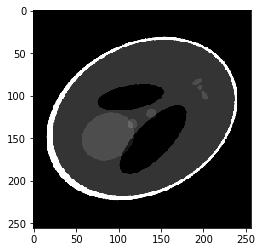

In [17]:
# show the standard transformation result
theta = 118
scaling_rate = 0.5
standard_img = (img.rotate(theta)).resize((int(h*scaling_rate), int(w*scaling_rate)))
plt.figure()
plt.imshow(standard_img, cmap='gray')
plt.show()

In [ ]:
# show your transformation result

# get the shape of the output
new_shape = (np.array(np.shape(img))*scaling_rate).astype(int)
h, w = np.shape(img)
# get the related affine matrix
affine, iaffine = get_affine_matrix([('shift', [-w/2, -h/2]),('rotation',theta), ('shift', [w/2, h/2]), ('scaling', scaling_rate)])
# transform the image
transfered_img = transform(np.array(img), affine, iaffine, new_shape)
plt.figure()
plt.imshow(transfered_img, cmap='gray')
plt.show()

# Bonus: Write a solver function that retrieves the affine transformation (in terms of a sequence of elementary transformations) between two provided images (depicting the same object transformed by an affine transformation). Justify your approach and comment on the limitations.

In [ ]:
# generate the random transformation
random_theta = np.random.random()*180
random_scaling = np.random.random()*0.5 + 0.5
random_shift_x = (np.random.random()-0.5)*w*0.1
random_shift_y = (np.random.random()-0.5)*h*0.1

# get the random transformed image
random_shape = (np.array(np.shape(img))*random_scaling).astype(int)
# affine, iaffine = get_affine_matrix([('rotation', random_theta), ('scaling', random_scaling), ('shift', [random_shift_x, random_shift_y])])
affine, iaffine = get_affine_matrix([('shift', [-w/2, -h/2]),('rotation',theta), ('shift', [w/2, h/2]), ('scaling', random_scaling), ('shift', [random_shift_x, random_shift_y])])
random_transformed_img = transform(np.array(img), affine, iaffine, random_shape)

# show the image
plt.figure()
plt.imshow(random_transformed_img, cmap='gray')
plt.show()

# show the affine matrix
print(affine)

Now write your own code to get the affine matrix based on the original image and random transformed image. And give a description of your method and result.

In [ ]:
def solver(img, random_transformed_img):
  return affine_matrix